In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('Preprocessed_Data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,954457215,48,0,1,2.0,40.0,113,56,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31,1,1,4.0,55.0,112,46,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32,1,0,2.0,46.0,104,49,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1,1,1.0,53.0,94,53,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35,0,1,5.0,44.0,112,43,0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   Age                                                              68536 non-null  int64  
 2   Gender                                                           68536 non-null  int64  
 3   Marital Status (at the time of application)                      68536 non-null  int64  
 4   No of dependents                                                 68536 non-null  float64
 5   Income                                                           68536 non-null  float64
 6   No of months in current residence                                68536 non-null  int64  
 7   No of months in current company         

In [31]:
# df_cat = df.select_dtypes(include='object')


In [5]:
# df[df_cat.columns] = df[df_cat.columns].astype('category')

In [67]:
df[df.columns] = df[df.columns].astype('int64')

In [68]:
df['Performance Tag'] = df['Performance Tag'].astype('category')

In [69]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [70]:
y_test = df_test['Performance Tag']
X_test = df_test.drop('Performance Tag', axis=1)

In [71]:
X_test.shape

(13708, 35)

In [72]:
y_train = df_train['Performance Tag']
X_train = df_train.drop('Performance Tag', axis=1)

In [73]:
X_train.shape

(54828, 35)

In [74]:
X_train = X_train.drop('Application ID', 1)


In [75]:
col = X_train.columns

In [76]:
sum(y_train)

2317

In [77]:
len(y_train)

54828

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [21]:
y_pred = model.predict(X_test[col])

In [22]:
metrics.confusion_matrix(y_test, y_pred)

array([[13127,     7],
       [  574,     0]], dtype=int64)

In [78]:
sm = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [79]:
X_train_sm.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,55,1,1,1,23,101,33,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,28,1,1,3,43,6,52,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,1,0,1,4,115,71,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,43,1,1,5,6,6,24,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,57,1,1,1,31,6,22,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [80]:
sum(y_train_sm)

31943

In [81]:
len(y_train_sm)

53365

In [82]:
model_sm = XGBClassifier()
model_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
y_pred_sm = model_sm.predict(X_test[col])

In [84]:
metrics.confusion_matrix(y_test, y_pred_sm)

array([[10831,  2303],
       [  408,   166]], dtype=int64)

In [85]:
print(metrics.classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89     13134
           1       0.07      0.29      0.11       574

    accuracy                           0.80     13708
   macro avg       0.52      0.56      0.50     13708
weighted avg       0.93      0.80      0.86     13708



In [86]:
n_folds = 3

xgb = XGBClassifier()

scorer = {
    #'accuracy': make_scorer(accuracy_score),
    #'f1': make_scorer(f1_score)
    'recall' : metrics.make_scorer(metrics.recall_score)
    }

#imba_pipeline = make_pipeline(SMOTE(random_state=100), rf)
imba_pipeline = make_pipeline(SMOTEENN(random_state=42), xgb)

param = 'xgbclassifier__'

In [87]:
# specify range of hyperparameters
param_grid = {param+'subsample': [0.3, 0.6, 0.9]}          

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline, 
                        param_grid = param_grid, 
                        scoring= scorer,
                        refit='recall', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_train, y_train)   


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=No...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__subsample': [0.3, 0.6, 0.9]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score)}, verbose=1)

In [88]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__subsample,params,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,mean_train_recall,std_train_recall
0,134.425471,2.918459,0.043549,0.001882,0.3,{'xgbclassifier__subsample': 0.3},0.255181,0.239637,0.249677,0.248165,0.006435,1,0.495146,0.510680,0.522668,0.509498,0.011267
1,146.152318,9.536749,0.053856,0.014103,0.6,{'xgbclassifier__subsample': 0.6},0.229275,0.259067,0.244502,0.244281,0.012164,2,0.535275,0.556634,0.590026,0.560645,0.022531
2,156.537697,8.986937,0.051530,0.006582,0.9,{'xgbclassifier__subsample': 0.9},0.209845,0.243523,0.241915,0.231761,0.015511,3,0.573463,0.596117,0.583549,0.584376,0.009267


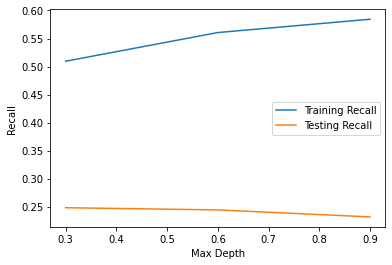

In [89]:
plt.figure()

plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_train_recall'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_test_recall'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.show()

In [90]:
y_pred_sub = model_cv.predict(X_test[col])

In [91]:
print(metrics.classification_report(y_test, y_pred_sub))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     13134
           1       0.07      0.28      0.11       574

    accuracy                           0.80     13708
   macro avg       0.51      0.55      0.50     13708
weighted avg       0.93      0.80      0.86     13708



In [92]:
metrics.confusion_matrix(y_test, y_pred_sub)

array([[10843,  2291],
       [  414,   160]], dtype=int64)

In [60]:
# specify range of hyperparameters
param_grid = {param+'learning_rate': [0.2, 0.6]}          

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline, 
                        param_grid = param_grid, 
                        scoring= scorer,
                        refit='recall', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_train, y_train)   


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=No...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.2, 0.6]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score)}, verbose=1)

In [61]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__learning_rate,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,31.909276,2.444622,0.037699,0.003753,0.2,{'xgbclassifier__learning_rate': 0.2},0.092873,0.088362,0.099138,0.090713,...,0.091496,0.004399,2,0.274542,0.258500,0.271452,0.275620,0.256742,0.267371,0.008097
1,31.877161,0.971057,0.034707,0.000977,0.6,{'xgbclassifier__learning_rate': 0.6},0.129590,0.116379,0.114224,0.123110,...,0.119987,0.005647,1,0.626214,0.620615,0.631409,0.648328,0.640777,0.633468,0.009963


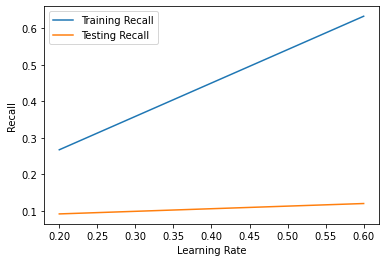

In [62]:
plt.figure()

plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_train_recall'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_test_recall'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Recall')

plt.show()

In [63]:
y_pred_lr = model_cv.predict(X_test[col])

In [64]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     13134
         1.0       0.07      0.13      0.09       574

    accuracy                           0.89     13708
   macro avg       0.51      0.52      0.51     13708
weighted avg       0.92      0.89      0.91     13708



In [65]:
metrics.confusion_matrix(y_test, y_pred_lr)

array([[12112,  1022],
       [  501,    73]], dtype=int64)

In [93]:
# specify range of hyperparameters
param_grid = {param+'n_estimators': [10,50,100]}          

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline, 
                        param_grid = param_grid, 
                        scoring= scorer,
                        refit='recall', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)   

model_cv.fit(X_train, y_train)   


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=No...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__n_estimators': [10, 50, 100]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score)}, verbose=1)

In [94]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__n_estimators,params,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,mean_train_recall,std_train_recall
0,233.372199,11.669747,0.101396,0.026062,10,{'xgbclassifier__n_estimators': 10},0.335492,0.367876,0.371281,0.358216,0.016128,1,0.436893,0.469903,0.463731,0.456842,0.014329
1,263.902396,19.177831,0.166886,0.073579,50,{'xgbclassifier__n_estimators': 50},0.240933,0.287565,0.261320,0.263272,0.019087,2,0.456958,0.495793,0.482513,0.478421,0.016116
2,221.620725,21.427887,0.061835,0.005085,100,{'xgbclassifier__n_estimators': 100},0.213731,0.277202,0.235446,0.242126,0.026339,3,0.565049,0.600000,0.591969,0.585672,0.014947


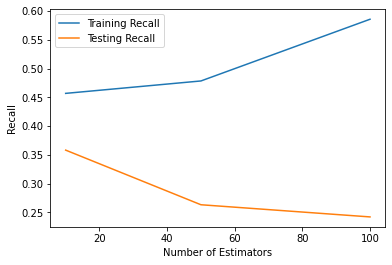

In [95]:
plt.figure()

plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_train_recall'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_test_recall'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')

plt.show()

In [96]:
y_pred = model_cv.predict(X_test[col])

In [97]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     13134
           1       0.06      0.41      0.11       574

    accuracy                           0.72     13708
   macro avg       0.51      0.57      0.47     13708
weighted avg       0.93      0.72      0.80     13708



In [98]:
metrics.confusion_matrix(y_test, y_pred)

array([[9635, 3499],
       [ 336,  238]], dtype=int64)